In [12]:
import numpy as np 
import matplotlib.pyplot as plt


In [13]:
def f(x):
    return np.exp(x)-2
def df(x):
    return np.exp(x)

In [14]:
def Newton(x,f,df):
    errors=[]
    x_new=x
    x_old=0
    errors.append(np.abs(f(x_new)))
    count=1
    while(np.abs(f(x_new))>1e-6):
        x_old=x_new
        x_new=x_old-f(x_old)/df(x_old)
        errors.append(np.abs(f(x_new)))
        count+=1

    return x_new ,errors,count

In [15]:
def bisection(x_start,x_end):
    t=(x_end-x_start)/2
    count=1
    errors=[]
    errors.append(np.abs(f(t)))
    while(np.abs(f(t))>1e-6):
        if(f(t)*f(x_end)<0):
            x_start=t
        elif (f(t)*f(x_start)<0):
            x_end=t
        
        t=(x_end+x_start)/2
        errors.append(np.abs(f(t)))
        count+=1
    
    return t , errors ,count
        

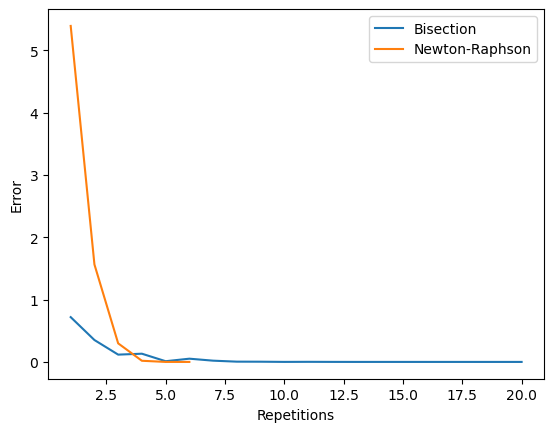

In [16]:
solutionsN ,errorsN, countsN = Newton(2,f,df)
solutionsB,errorsB,countsB = bisection(0,2)
repsN=[]
repsB=[]
for i in range(countsN):
    repsN.append(i+1)
for j in range(countsB):
    repsB.append(j+1)

plt.plot(repsB,errorsB,label='Bisection')
plt.plot(repsN,errorsN,label='Newton-Raphson')
plt.xlabel('Repetitions')
plt.legend()
plt.ylabel('Error')
plt.show()


In [17]:
def p(x):
    return x**5+(7*(x**4))-(5*(x**3))-(75*(x**2))-(36*x)+108
def dp(x):
    return 5*(x**4)+(28*(x**3))-(15*(x**2))-(150*x)-36
def ddp(x):
    return 20 * x**3 + 84 * x**2 - 30*x - 150

In [18]:
print(dp(-6),dp(-5))
print(dp(-3),dp(-2))
print(dp(-2),dp(0))
print(dp(-1),dp(1))
print(dp(2),dp(3))

756 -36
-72 60
60 -36
76 -168
-92 540


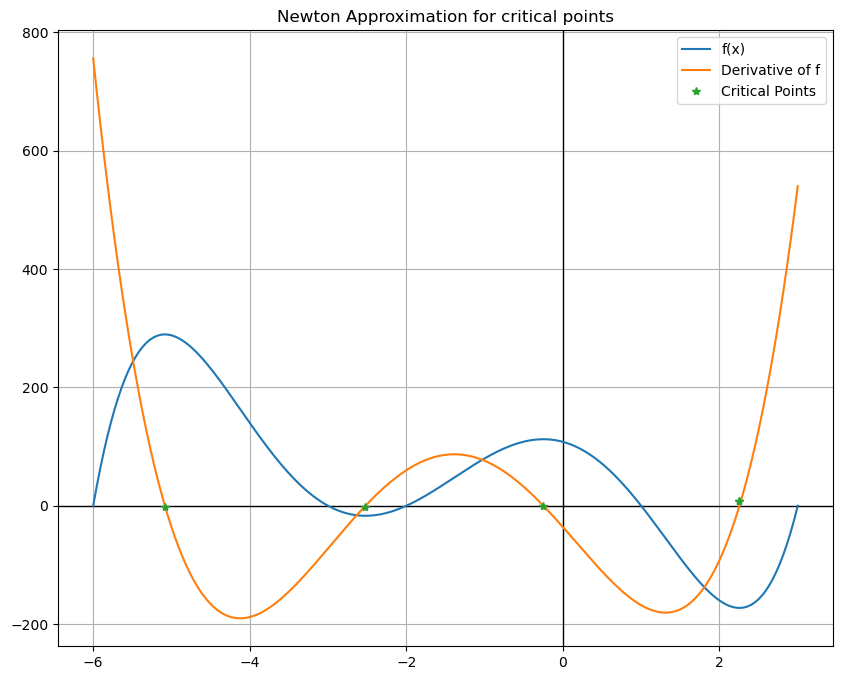

In [19]:
points = [ -5, -2, 0, 1, 3 ] 
vals=np.array([Newton(x,dp,ddp)[0] for x in points])
plt.figure(figsize=(10,8))
plt.title('Newton Approximation for critical points')
y=np.linspace(-6,3,200)

plt.axhline(0, color='black',linewidth=1)  
plt.axvline(0, color='black',linewidth=1)
plt.plot(y,p(y),label='f(x)')
plt.plot(y,dp(y),label='Derivative of f')
plt.plot(vals,f(vals),'*',label='Critical Points')

plt.legend()
plt.grid()
plt.show()        